In [1]:
%pylab inline
from pycheops.models import RVModel
from lmfit import report_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
T_0 = 0.5
P = 2.0
K = 1.5
f_c = 0.3
f_s = -0.2

In [3]:
m = RVModel()
pars = m.make_params(T_0=T_0, K=K, f_c=f_c, f_s=f_s)
pars['P'].set(value=P, vary=False)
pars

Parameters([('T_0', <Parameter 'T_0', 0.5, bounds=[-inf:inf]>),
            ('P', <Parameter 'P', value=2.0 (fixed), bounds=[1e-15:inf]>),
            ('K', <Parameter 'K', 1.5, bounds=[1e-15:inf]>),
            ('f_c', <Parameter 'f_c', value=0.3 (fixed), bounds=[-1:1]>),
            ('f_s', <Parameter 'f_s', value=-0.2 (fixed), bounds=[-1:1]>),
            ('sini', <Parameter 'sini', value=1 (fixed), bounds=[0:1]>)])

(0.5, 2.450000000000002)

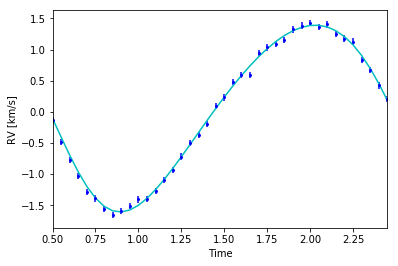

In [6]:
t = np.arange(T_0,T_0 + P, 0.05)
yerr = 0.05
rv_true = m.eval(params=pars, t=t)
rv = rv_true + normal(0.0, yerr, size=len(t))
fig,ax=subplots()
ax.errorbar(t, rv, yerr=yerr,fmt='bo',ms=2)
ax.plot(t, rv_true,'c')
ax.set_xlabel('Time')
ax.set_ylabel('RV [km/s]')
ax.set_xlim(min(t),max(t))
#ax.set_ylim(0,1.5*pars['_F'].value)


In [7]:
result = m.fit(rv, pars, t=t, weights=1/yerr)
report_fit(result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 40
    # variables        = 2
    chi-square         = 39.5152021
    reduced chi-square = 1.03987374
    Akaike info crit   = 3.51224026
    Bayesian info crit = 6.88999917
[[Variables]]
    T_0:   0.49584288 +/- 0.00237177 (0.48%) (init = 0.5)
    P:     2 (fixed)
    K:     1.50311980 +/- 0.01148923 (0.76%) (init = 1.5)
    f_c:   0.3 (fixed)
    f_s:  -0.2 (fixed)
    sini:  1 (fixed)


(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

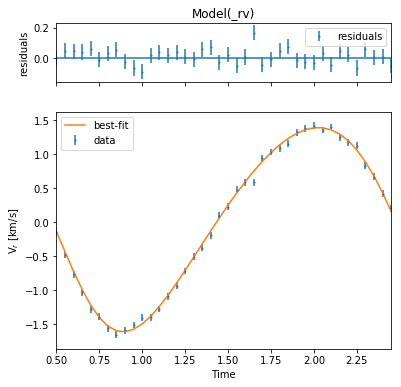

In [8]:
result.plot(xlabel='Time',ylabel=r'V$_r$ [km/s]',data_kws={'ms':1},ax_fit_kws={'xlim':[min(t),max(t)]})